## **Import packages and load data**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

df_main = pd.read_csv('https://raw.githubusercontent.com/feliceelena/DataSets/main/data_for_predictions.csv')
df_main.drop(columns = "Unnamed: 0", axis = 1, inplace = True)
df_main.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


## **Model training and evaluation**

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import scipy
from scipy import stats

# Defining
X = df_main.drop(['churn', 'id'], axis = 1)
y = df_main['churn']

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

# Create a model
model = RandomForestClassifier(n_estimators = 1000, random_state = 13)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation metrics
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))
print('F1 Score:', metrics.f1_score(y_test, y_pred))
print('Precision Score:', metrics.precision_score(y_test, y_pred))
print('Recall Score:', metrics.recall_score(y_test, y_pred))
print('True Positive:', confusion_matrix(y_test, y_pred)[0,0])
print('False Positive:', confusion_matrix(y_test, y_pred)[0,1])
print('False Negative:', confusion_matrix(y_test, y_pred)[1,0])
print('True Negative:', confusion_matrix(y_test, y_pred)[1,1])

Accuracy Score: 0.9130534002738475
F1 Score: 0.11188811188811189
Precision Score: 0.8888888888888888
Recall Score: 0.05970149253731343
True Positive: 3977
False Positive: 3
False Negative: 378
True Negative: 24


In [ ]:
df_main['churn'].value_counts(normalize = True)

churn
0    0.902848
1    0.097152
Name: proportion, dtype: float64

Before we train the model, the data is going to be split into 70% training and 30% test data. We use Random Forest as a classification model with n_estimators set to 1000 which mean the data will go through 1000 iteration to build the model.

The ratio of churn and retention is around 1:9, therefore this data is considered as **imbalanced data**. To evaluate the model performance on imbalanced data, we use Recall score, Precision score, and F1-Score.

**Recall** calculate the ability of the model to find all the positive (churners) samples. **Precision** calculate the ability of the model to not label a negative (non-churners) sample as positive (churn), and **F1-Score** calculate the trade-off between Precision and Recall. Simply, if a model has a high score in both Precision and Recall, then the F1-Score will have a high score as well.

The F1-Score of this model is 11% which tells us that this model has **a very poor ability** to distinguish between churners and non-churners. A high precision score (88%) shows that when the model predicts that someone will churn, it is correct 88% of the time. While 5% as a Recall score tells us that the model only identifies 5% of the churners.

Despite the model being poorly classify between the churners and non-churners, we would like to know if the price sensitivity affect the likelihood of churning customers, which is our main hypothesis. Therefore, we would like to analyze **which feature** has the **most effect in churning customers**.

## **Feature importance**

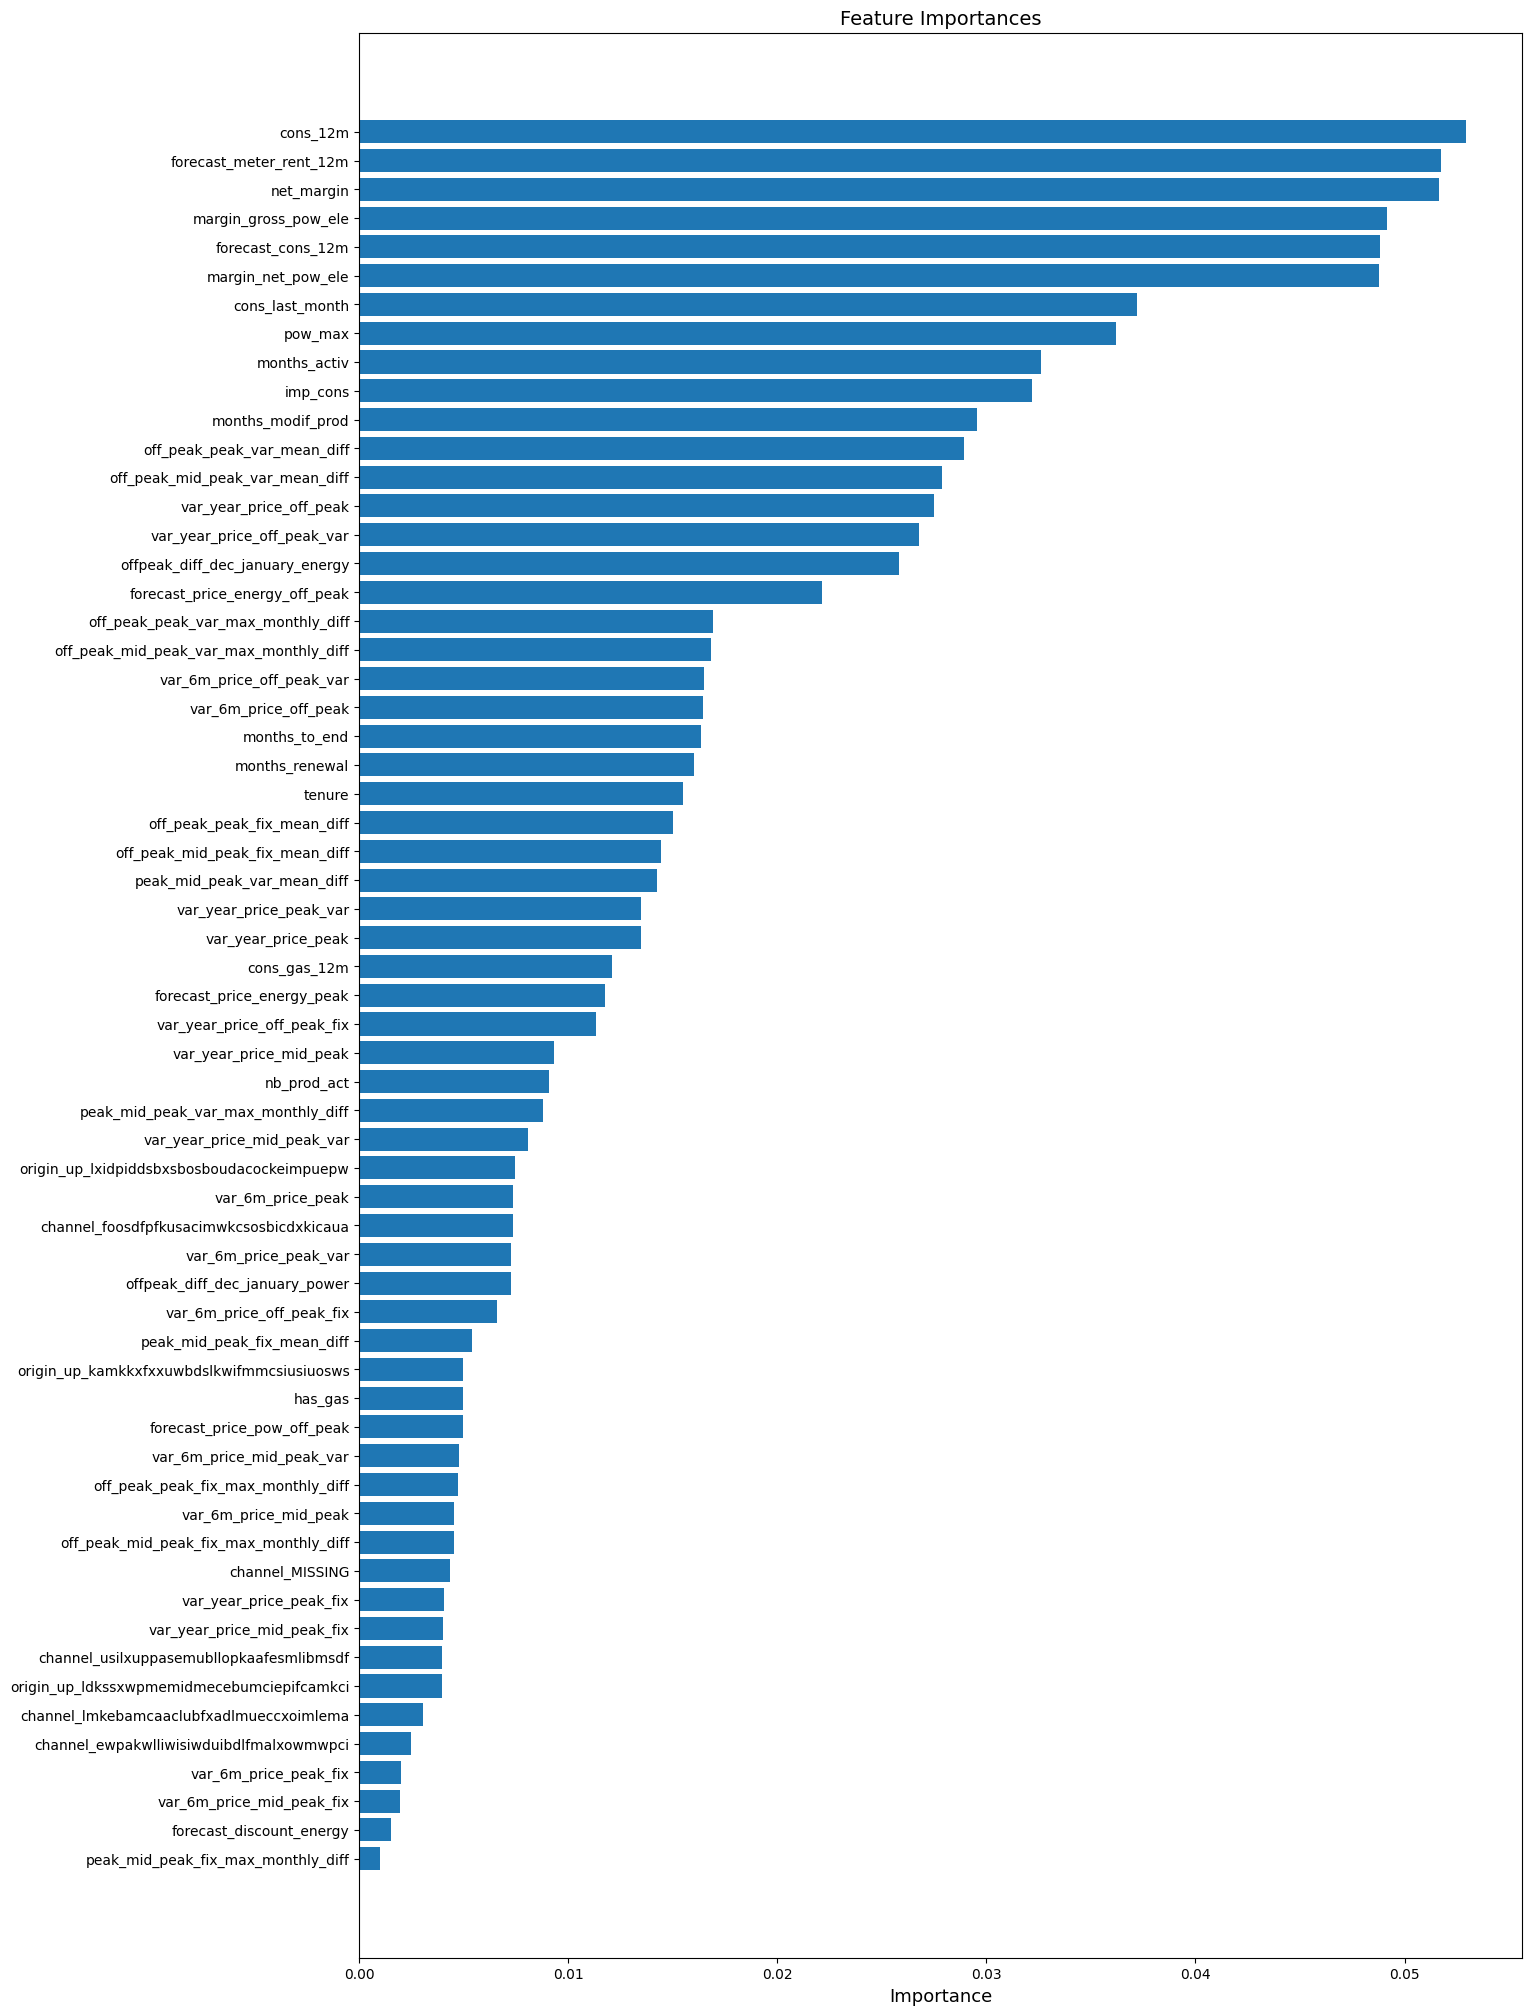

In [ ]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

plt.figure(figsize=(15, 25))
plt.title('Feature Importances', size = 14)
plt.barh(range(len(feature_importances)), feature_importances['importance'], align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance', fontsize = 13)
plt.show()

From this chart, we can conclude these points:
- Electricity consumption and the forecasted bill of meter rental are the top driver for churn in this model.
- The margin of energy subscription is also another top driver for churn.
- Some of the price sensitivity features are at the top half on the chart but the others are scattering around and mostly are at the bottom.
- Time looks like an important factor as some of the features such as number of months as an active user and months between product modification are at the top 20% of the most important feature.

Based on the output of the feature importances, price sensitivity is not a main driver but it is a weak contributor. However, to arrive at a conclusive result, more experimentation is needed.